# Linear Regression

Connect to Google Drive:

In [1]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Load the dataset:

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/AI/datasets/urban_bliss_index_2024.csv')

In [3]:
df.head()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,New York,January,2024,70,High,35,40,6.5,100,80
1,Los Angeles,January,2024,65,Medium,40,50,6.8,90,75
2,Chicago,January,2024,60,Medium,30,55,7.0,85,70
3,London,January,2024,55,High,50,60,7.2,110,85
4,Paris,January,2024,60,High,45,65,6.9,95,80


In [4]:
df.tail(6)

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
539,Wairau Valley,November,2029,50,Low,2400,25,-121.4,20,97
540,St Arnaud,November,2029,55,Low,2405,20,-121.7,25,98
541,Murchison,December,2029,60,Medium,2410,35,-122.0,20,95
542,Reefton,December,2029,55,Low,2415,30,-122.3,25,96
543,Greymouth,December,2029,50,Low,2420,25,-122.6,20,97
544,Hokitika,December,2029,55,Low,2425,20,-122.9,25,98


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  545 non-null    object 
 1   Month                 545 non-null    object 
 2   Year                  545 non-null    int64  
 3   Decibel_Level         545 non-null    int64  
 4   Traffic_Density       545 non-null    object 
 5   Green_Space_Area      545 non-null    int64  
 6   Air_Quality_Index     545 non-null    int64  
 7   Happiness_Score       545 non-null    float64
 8   Cost_of_Living_Index  545 non-null    int64  
 9   Healthcare_Index      545 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 42.7+ KB


In [6]:
df.describe()

,Year,Decibel_Level,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,2026.082569,56.779817,1085.366972,38.036697,-44.865505,30.458716,93.086239
std,1.652363,6.856402,756.993165,36.300656,42.407240,21.082180,10.550034
min,2024.000000,50.000000,5.000000,5.000000,-122.900000,20.000000,35.000000
25%,2025.000000,55.000000,385.000000,25.000000,-82.100000,20.000000,95.000000
50%,2026.000000,55.000000,1065.000000,30.000000,-41.300000,25.000000,96.000000
75%,2027.000000,60.000000,1745.000000,35.000000,-0.500000,25.000000,97.000000
max,2029.000000,90.000000,2425.000000,245.000000,8.600000,130.000000,99.000000


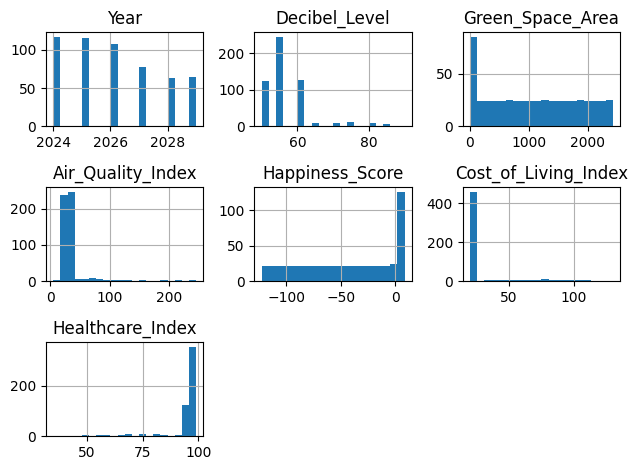

In [9]:
import matplotlib.pyplot as plt

hist = df.hist(bins=20)
plt.tight_layout()
plt.show()

In [10]:
df["City"].unique()

array(['New York', 'Los Angeles', 'Chicago', 'London', 'Paris', 'Berlin',
       'Tokyo', 'Seoul', 'Mumbai', 'Sydney', 'Istanbul', 'Rio de Janeiro',
       'Toronto', 'Mexico City', 'Cape Town', 'Bangkok', 'Buenos Aires',
       'Amsterdam', 'Cairo', 'Moscow', 'Singapore', 'Dubai', 'Hong Kong',
       'Barcelona', 'Lisbon', 'Melbourne', 'Auckland', 'Rome', 'Athens',
       'Vienna', 'Dublin', 'Copenhagen', 'Stockholm', 'Oslo', 'Helsinki',
       'Prague', 'Budapest', 'Warsaw', 'Sofia', 'Belgrade', 'São Paulo',
       'Lima', 'Santiago', 'Bogota', 'Caracas', 'Quito', 'Panama City',
       'Kingston', 'Havana', 'Santo Domingo', 'San Juan', 'Manila',
       'Jakarta', 'Kuala Lumpur', 'Taipei', 'Shanghai', 'Beijing',
       'New Delhi', 'Tehran', 'Karachi', 'Dhaka', 'Colombo', 'Islamabad',
       'Kathmandu', 'Yangon', 'Hanoi', 'Phnom Penh', 'Vientiane',
       'Bangalore', 'Ho Chi Minh City', 'Perth', 'Adelaide', 'Brisbane',
       'Canberra', 'Wellington', 'Christchurch', 'Dunedin', 'Que

In [11]:
df.drop("City", axis=1, inplace=True)

In [12]:
df

,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,January,2024,70,High,35,40,6.5,100,80
1,January,2024,65,Medium,40,50,6.8,90,75
2,January,2024,60,Medium,30,55,7.0,85,70
3,January,2024,55,High,50,60,7.2,110,85
4,January,2024,60,High,45,65,6.9,95,80
...,...,...,...,...,...,...,...,...,...
540,November,2029,55,Low,2405,20,-121.7,25,98
541,December,2029,60,Medium,2410,35,-122.0,20,95
542,December,2029,55,Low,2415,30,-122.3,25,96
543,December,2029,50,Low,2420,25,-122.6,20,97


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [28]:
ordinal_encoder_ct = ColumnTransformer(
    transformers=[
        ("ordinal_encoder", OrdinalEncoder(), ["Month", "Traffic_Density"])
    ],
    remainder="passthrough"
)

In [29]:
encoded_df = pd.DataFrame(ordinal_encoder_ct.fit_transform(df),
                          columns=ordinal_encoder_ct.get_feature_names_out())

In [30]:
encoded_df.head()

,ordinal_encoder__Month,ordinal_encoder__Traffic_Density,remainder__Year,remainder__Decibel_Level,remainder__Green_Space_Area,remainder__Air_Quality_Index,remainder__Happiness_Score,remainder__Cost_of_Living_Index,remainder__Healthcare_Index
0,4.0,0.0,2024.0,70.0,35.0,40.0,6.5,100.0,80.0
1,4.0,2.0,2024.0,65.0,40.0,50.0,6.8,90.0,75.0
2,4.0,2.0,2024.0,60.0,30.0,55.0,7.0,85.0,70.0
3,4.0,0.0,2024.0,55.0,50.0,60.0,7.2,110.0,85.0
4,4.0,0.0,2024.0,60.0,45.0,65.0,6.9,95.0,80.0


In [31]:
encoded_df["ordinal_encoder__Month"].value_counts()

7.0     56
3.0     52
6.0     46
0.0     45
5.0     45
1.0     45
4.0     44
10.0    44
8.0     43
11.0    43
2.0     42
9.0     40
Name: ordinal_encoder__Month, dtype: int64

In [32]:
unique_months = df["Month"].unique()

comparison_df = pd.DataFrame({"Old_Month": unique_months,
                              "Encoded_Month": encoded_df["ordinal_encoder__Month"].unique()})

comparison_df = comparison_df.sort_values(by="Old_Month").reset_index(drop=True)

print(comparison_df)

    Old_Month  Encoded_Month
0       April            0.0
1      August            1.0
2    December            2.0
3    February            3.0
4     January            4.0
5        July            5.0
6        June            6.0
7       March            7.0
8         May            8.0
9    November            9.0
10    October           10.0
11  September           11.0


In [33]:
unique_td = df["Traffic_Density"].unique()

comparison_df = pd.DataFrame({"Old_Traffic_Density": unique_td,
                              "Encoded_Traffic_Density": encoded_df["ordinal_encoder__Traffic_Density"].unique()})

comparison_df = comparison_df.sort_values(by="Old_Traffic_Density").reset_index(drop=True)

print(comparison_df)

  Old_Traffic_Density  Encoded_Traffic_Density
0                High                      0.0
1                 Low                      1.0
2              Medium                      2.0
3           Very High                      3.0


In [42]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ordinal_encoder__Month            545 non-null    float64
 1   ordinal_encoder__Traffic_Density  545 non-null    float64
 2   remainder__Year                   545 non-null    float64
 3   remainder__Decibel_Level          545 non-null    float64
 4   remainder__Green_Space_Area       545 non-null    float64
 5   remainder__Air_Quality_Index      545 non-null    float64
 6   remainder__Happiness_Score        545 non-null    float64
 7   remainder__Cost_of_Living_Index   545 non-null    float64
 8   remainder__Healthcare_Index       545 non-null    float64
dtypes: float64(9)
memory usage: 38.4 KB


# Only for an Individual Regression: Happiness_Score

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [35]:
X = encoded_df.drop('remainder__Happiness_Score', axis=1)
y = encoded_df['remainder__Happiness_Score']

In [36]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [37]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

Loss Function => MSE

In [38]:
from sklearn.metrics import mean_squared_error

In [40]:
val_predictions = linear_regression_model.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)
print("Validation MSE:", val_mse)

test_predictions = linear_regression_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
print("Test MSE:", test_mse)

cv_scores = cross_val_score(linear_regression_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -np.mean(cv_scores)
print("Cross-Validation MSE:", cv_mse)

Validation MSE: 1.282877782519204
Test MSE: 1.1577706349863177
Cross-Validation MSE: 0.8101719939870844


In [47]:
values={
    'ordinal_encoder__Month': 5.0,
    'ordinal_encoder__Traffic_Density': 2.0,
    'remainder__Year': 2025.0,
    'remainder__Decibel_Level': 82.4,
    'remainder__Green_Space_Area': 78.6,
    'remainder__Air_Quality_Index': 56.9,
    'remainder__Cost_of_Living_Index': 85.3,
    'remainder__Healthcare_Index': 89.5
}

df_for_test = pd.DataFrame([values])
predictions = linear_regression_model.predict(df_for_test)
print(f"Happiness Score: {predictions[0]}")

Happiness Score: 8.189383817408554


#Multiple Regression:


*   Air_Quality_Index
*   Happiness_Score
*   Cost_of_Living_Index
*   Healthcare_Index





In [51]:
X = encoded_df.drop(['remainder__Air_Quality_Index','remainder__Happiness_Score','remainder__Cost_of_Living_Index','remainder__Healthcare_Index'], axis=1)
y = encoded_df[['remainder__Air_Quality_Index','remainder__Happiness_Score','remainder__Cost_of_Living_Index','remainder__Healthcare_Index']]

In [54]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [52]:
from sklearn.multioutput import MultiOutputRegressor

multiple_regression_model = MultiOutputRegressor(LinearRegression())

In [55]:
multiple_regression_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=LinearRegression())

In [56]:
val_predictions = multiple_regression_model.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)
print("Validation MSE:", val_mse)

test_predictions = multiple_regression_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
print("Test MSE:", test_mse)

cv_scores = cross_val_score(multiple_regression_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -np.mean(cv_scores)
print("Cross-Validation MSE:", cv_mse)

Validation MSE: 221.47239114296278
Test MSE: 267.0266227626964
Cross-Validation MSE: 117.60632381302784


In [58]:
values={
    'ordinal_encoder__Month': 5.0,
    'ordinal_encoder__Traffic_Density': 2.0,
    'remainder__Year': 2025.0,
    'remainder__Decibel_Level': 82.4,
    'remainder__Green_Space_Area': 78.6
}

df_for_test = pd.DataFrame([values])
predictions = multiple_regression_model.predict(df_for_test)
print(predictions)

[[157.73716363  -0.42238134  64.59448879  56.34111786]]
